# CitiBike Data Analysis

Your notebook must display
* the complete formulation of the hypothesis to be tested
* the data tables for the unreducted datasets (first few columns)
* the data tables for the reducted datasets (first few columns)
* the plots for each dataframe, with usual rules for plotting applying: visible and readable axes, title, legend, caption.

## Idea: Subscribers bike more on the weekday and Customers bike more on the weekends.

## NULL HYPOTHESIS
### The ratio of subscribers biking on weekdays over subscribers biking on weekends is the same or lower than the ratio of customers biking on weekdays over customers biking on weekends a significance level of $\alpha = 0.05$.

## $H_0$ : $\frac{S_{\mathrm{weekday}}}{S_{\mathrm{weekend}}} <= \frac{C_{\mathrm{weekday}}}{C_{\mathrm{weekend}}}$

## $H_1$ : $\frac{S_{\mathrm{weekday}}}{S_{\mathrm{weekend}}} > \frac{C_{\mathrm{weekday}}}{C_{\mathrm{weekend}}}$

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import sys
import os
import seaborn as sns
from evalChisq import evalChisq

%pylab inline

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
def getCitiBikeCSV(datestring):
    '''
    Retrieves the CitiBike CSV file given a datestring
    and saves it in the directory specified in $PUIDATA
    
    Argument:
        datestring: String in format YYYYMM
    '''
    
    PUIdata = os.getenv("PUIDATA")
    
    print ("Downloading", datestring)
    
    ### First I will check that it is not already there
    if not os.path.isfile(PUIdata + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + PUIdata):
                print ("Error moving file!, Please check!")
                
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(PUIdata + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + PUIdata)
            ### unzip the csv 
            os.system("unzip " + PUIdata + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + PUIdata)
    
    ### One final check:
    if not os.path.isfile(PUIdata + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201612'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
PUIdata = os.getenv('PUIDATA')
print(PUIdata)

/home/cusp/uc288/PUIdata


### NOTE TO SELF: Trip duration is in SECONDS

In [5]:
data = pd.read_csv(PUIdata + '/' + datestring + '-citibike-tripdata.csv', 
                   infer_datetime_format=True,
                   parse_dates=['Start Time', 'Stop Time'])
data.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,528,2016-12-01 00:00:04,2016-12-01 00:08:52,499,Broadway & W 60 St,40.769155,-73.981918,228,E 48 St & 3 Ave,40.754601,-73.971879,26931,Subscriber,1964.0,1
1,218,2016-12-01 00:00:28,2016-12-01 00:04:06,3418,Plaza St West & Flatbush Ave,40.675021,-73.971115,3358,Garfield Pl & 8 Ave,40.671198,-73.974841,27122,Subscriber,1955.0,1
2,399,2016-12-01 00:00:39,2016-12-01 00:07:19,297,E 15 St & 3 Ave,40.734232,-73.986923,345,W 13 St & 6 Ave,40.736494,-73.997044,19352,Subscriber,1985.0,1
3,254,2016-12-01 00:00:44,2016-12-01 00:04:59,405,Washington St & Gansevoort St,40.739323,-74.008119,358,Christopher St & Greenwich St,40.732916,-74.007114,20015,Subscriber,1982.0,1
4,1805,2016-12-01 00:00:54,2016-12-01 00:31:00,279,Peck Slip & Front St,40.707873,-74.001670,279,Peck Slip & Front St,40.707873,-74.001670,23148,Subscriber,1989.0,1


In [6]:
data.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender'],
      dtype='object')

In [7]:
data.drop([u'Trip Duration', u'Stop Time', u'Start Station ID',
       u'Start Station Name', u'Start Station Latitude',
       u'Start Station Longitude', u'End Station ID', u'End Station Name',
       u'End Station Latitude', u'End Station Longitude', u'Bike ID',
       u'Birth Year', u'Gender'], axis=1, inplace=True)

In [8]:
data.rename(columns={'Start Time': 'date', 'User Type': 'usertype'}, inplace=True)

In [9]:
data.head()

,date,usertype
0,2016-12-01 00:00:04,Subscriber
1,2016-12-01 00:00:28,Subscriber
2,2016-12-01 00:00:39,Subscriber
3,2016-12-01 00:00:44,Subscriber
4,2016-12-01 00:00:54,Subscriber


In [10]:
data.usertype = data.usertype.replace('Subscriber', 1)
data.usertype = data.usertype.replace('Customer', 0)
data.head()

,date,usertype
0,2016-12-01 00:00:04,1.0
1,2016-12-01 00:00:28,1.0
2,2016-12-01 00:00:39,1.0
3,2016-12-01 00:00:44,1.0
4,2016-12-01 00:00:54,1.0


### Separating customer (\_c) and subscriber (\_w) to test the hypothesis.

#### User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)

In [11]:
counts_c = data['date'][data['usertype'] == 0].groupby([data['date'].dt.weekday]).count()
counts_s = data['date'][data['usertype'] == 1].groupby([data['date'].dt.weekday]).count()

In [12]:
type(counts_c)

pandas.core.series.Series

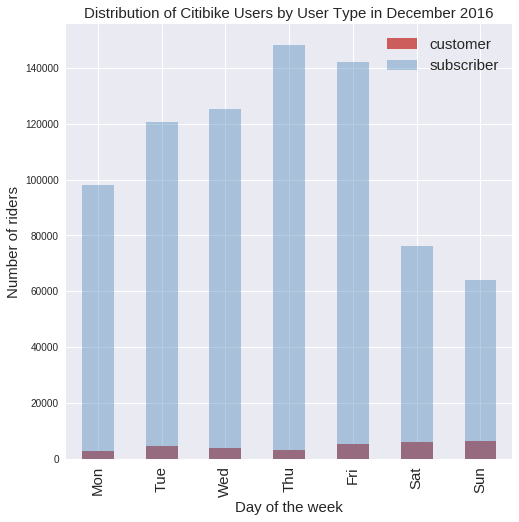

In [13]:
fig = pl.figure(figsize(8,8))
norm_c = 1
norm_s = 1

ax = ((counts_c)/norm_c).plot(kind='bar', color='IndianRed', label='customer')
ax = ((counts_s)/norm_s).plot(kind='bar', color='SteelBlue', label='subscriber', alpha=0.4)

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=15)
ax.set_xlabel('Day of the week', fontsize=15)
ax.set_ylabel('Number of riders', fontsize=15)
ax.set_title('Distribution of Citibike Users by User Type in December 2016', fontsize=15)
pl.legend(['customer','subscriber'],fontsize=15)

## Figure 1. Distribution of Citibike users by user type in December 2016, absolute counts
Based from the absolute counts, it can be seen that there seems to be more subscribers over than customers daily. However, it can also be seen that there is a decrease in the number of subscribers using the CitiBike on weekends.

#### For N counts, the error is $\sqrt{N}$, because counts follow a Poisson statistic

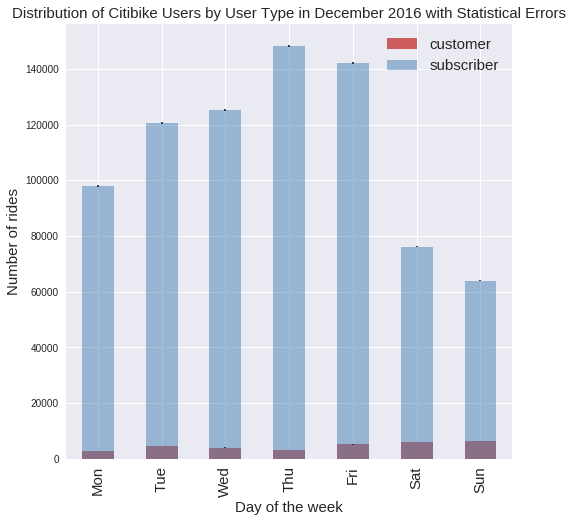

In [14]:
fig = pl.figure(figsize(8,8))

norm_c = 1
error_c = np.sqrt(counts_c)
ax = ((counts_c) / norm_c).plot(kind="bar", color='IndianRed', label='customer',
                               yerr=[((error_c) / norm_c, (error_c) / norm_c)])

norm_s = 1
error_s = np.sqrt(counts_s)
ax = ((counts_s) / norm_s).plot(kind="bar", color='SteelBlue', alpha=0.5, label='subscriber',
                               yerr=[((error_s) / norm_s, (error_s) / norm_s)])

ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=15)
ax.set_ylabel ("Number of rides", fontsize=15)
ax.set_xlabel ("Day of the week", fontsize=15)
ax.set_title('Distribution of Citibike Users by User Type in December 2016 with Statistical Errors', fontsize=15)
pl.legend(['customer','subscriber'],fontsize=15)

## Figure 2. Distribution of Citibike users by user type in December 2016, absolute counts, with statistical errors
There's not much difference from Figure 1, except the statistical errors are included in this plot.

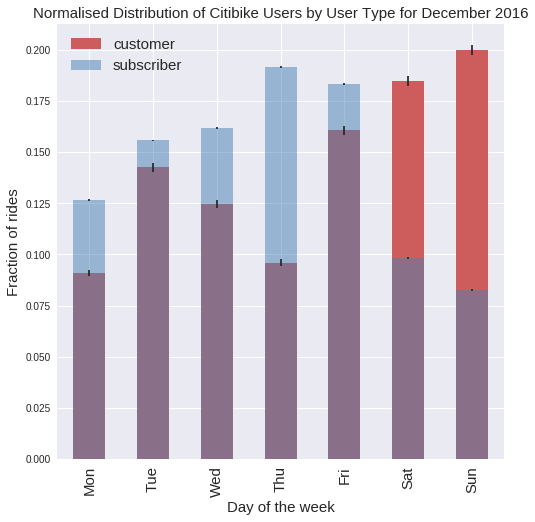

In [15]:
fig = pl.figure(figsize(8,8))

norm_c = counts_c.sum()
ax = ((counts_c) / norm_c).plot(kind="bar", color='IndianRed', label='customer',
                               yerr=[((error_c) / norm_c, (error_c) / norm_c)])

norm_s = counts_s.sum()
ax = ((counts_s) / norm_s).plot(kind="bar", color='SteelBlue', alpha=0.5, 
                                label='subscriber', yerr=[((error_s) / norm_s, (error_s) / norm_s)])

ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=15)
ax.set_ylabel ("Fraction of rides", fontsize=15)
ax.set_xlabel ("Day of the week", fontsize=15)
ax.set_title("Normalised Distribution of Citibike Users by User Type for December 2016", fontsize=15)
pl.legend(['customer','subscriber'],fontsize=15)

## Figure 3. Distribution of Citibike users by user type in December 2016, normalized
Now that the data is normalized, we can clearly see that there are more subscribers than customers out during the weekdays and that there are more customers than subscribers on the weekends.

In [16]:
weekday_c = ((counts_c) / norm_c)[:-2]
weekday_c

date
0    0.090973
1    0.142655
2    0.124854
3    0.095862
4    0.160733
Name: date, dtype: float64

In [17]:
weekend_c = ((counts_c) / norm_c)[-2:]
weekend_c

date
5    0.184806
6    0.200117
Name: date, dtype: float64

In [18]:
ratio_c = np.mean(weekday_c) / np.mean(weekend_c)
ratio_c

0.63916932907348245

In [19]:
weekday_s = ((counts_s) / norm_s)[:-2]
weekday_s

date
0    0.126514
1    0.155774
2    0.161775
3    0.191483
4    0.183432
Name: date, dtype: float64

In [20]:
weekend_s = ((counts_s) / norm_s)[-2:]
weekend_s

date
5    0.098379
6    0.082643
Name: date, dtype: float64

In [21]:
ratio_s = np.mean(weekday_s) / np.mean(weekend_s)
ratio_s

1.8096659579629291

## NULL HYPOTHESIS
### The ratio of subscribers biking on weekdays over subscribers biking on weekends is the same or lower than the ratio of customers biking on weekdays over customers biking on weekends a significance level of $\alpha = 0.05$.

## $H_0$ : $\frac{S_{\mathrm{weekday}}}{S_{\mathrm{weekend}}} <= \frac{C_{\mathrm{weekday}}}{C_{\mathrm{weekend}}}$

## $H_1$ : $\frac{S_{\mathrm{weekday}}}{S_{\mathrm{weekend}}} > \frac{C_{\mathrm{weekday}}}{C_{\mathrm{weekend}}}$

In [22]:
print('The ratio of subscribers biking on weekdays over subscribers biking on weekends is {}'.format(ratio_s))
print('The ratio of customers bikinhg on weekdays over customers biking on weekends is {}'.format(ratio_c))

The ratio of subscribers biking on weekdays over subscribers biking on weekends is 1.809665957962929
The ratio of customers bikinhg on weekdays over customers biking on weekends is 0.6391693290734825


## Based on the values, we can say the ratio of subscribers is HIGER than the ratio of customers
## $\frac{S_{\mathrm{weekday}}}{S_{\mathrm{weekend}}} = 1.80966595796$
## $\frac{C_{\mathrm{weekday}}}{C_{\mathrm{weekend}}} = 0.639169329073$

## Is it significantly enough?

---

# Set up the test of proportions

In [23]:
week_s = sum(counts_s[:-2]) * 1.0 / norm_s
weekend_s = sum(counts_s[-2:]) * 1.0 / norm_s

eweek_s = np.sqrt(sum(error_s[:-2]**2)) / norm_s
eweekend_s = np.sqrt(sum(error_s[-2:]**2)) / norm_s

week_c = sum(counts_c[:-2]) * 1.0 / norm_c
weekend_c = sum(counts_c[-2:]) * 1.0 / norm_c

eweek_c = np.sqrt(sum(error_c[:-2]**2)) / norm_c
eweekend_c = np.sqrt(sum(error_c[-2:]**2)) / norm_c

In [24]:
print("Subrscriber: week:{0:.4f}, weekend:{1:.4f}, weekend error:{2:.4f}, weekend error:{3:.4f}"\
      .format(week_s, weekend_s, eweek_s, eweekend_s))
print("Customer: week:{0:.4f}, weekend:{1:.4f}, weekend error:{2:.4f}, weekend error:{3:.4f}"\
      .format(week_c, weekend_c, eweek_c, eweekend_c))

Subrscriber: week:0.8190, weekend:0.1810, weekend error:0.0010, weekend error:0.0005
Customer: week:0.6151, weekend:0.3849, weekend error:0.0043, weekend error:0.0034


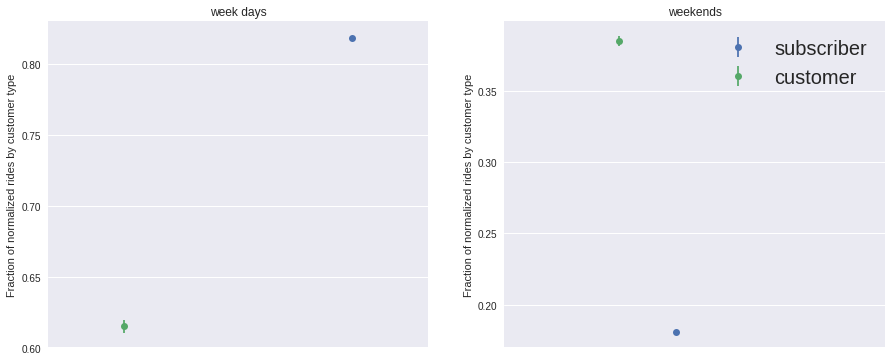

In [25]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

ax1.errorbar([0.4], [week_s], yerr=[eweek_s], fmt='o', label='subscriber')
ax1.errorbar([0.1], [week_c], yerr=[eweek_c], fmt='o', label='customer')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [weekend_s], yerr=[eweekend_s], fmt='o', label='subscriber')
ax2.errorbar([0.1], [weekend_c], yerr=[eweekend_c], fmt='o', label='customer')
ax1.set_xlim(0, 0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by customer type")
ax1.set_ylabel("Fraction of normalized rides by customer type")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

## Figure 4. Fraction of Citibike bikers per customer type in December 2016 for weekdays (left) and weekends (right)

In [26]:
sample_values = np.array([[week_s * norm_s, weekend_s * norm_s],[week_c * norm_c, weekend_c * norm_c]])
print(sample_values)

[[ 634116.  140162.]
 [  20006.   12520.]]


| User Type       |      weekday     |     weekend     |                   
|-----------------|------------------|-----------------|---------|
| Subscriber      | 0.819 * 774,278  | 0.181 * 774,278 | 774,278 |
| Customer        | 0.615 *  32,526  | 0.385 *  32,526 |  32,526 |
|                 |                  |                 |         |
| TOTAL           |    654,122       |     152,682     | 806,804 |

In [27]:
chisq = evalChisq(sample_values)

In [28]:
# degrees of freedom: Nvar - 1 
DOF = len(sample_values) - 1
print ('chi sq statistics for user type ridership on weekdays vs weekends: '+
       'chisq = {:.3f}, DOF = {:d}'.format(chisq, DOF))

chi sq statistics for user type ridership on weekdays vs weekends: chisq = 8458.307, DOF = 1


In [29]:
chi_minalpha95 = 3.84
print ("The null hypothesis that subscribers bike more on the weekends and customers bike more on weekdays")
if chisq > chi_minalpha95 :
    print ("can be rejected at alpha = 0.05")
else: 
    print ("cannot be rejected (p<0.05)")
print ("with a chi square statistics of {:.2f}".format(chisq))


The null hypothesis that subscribers bike more on the weekends and customers bike more on weekdays
can be rejected at alpha = 0.05
with a chi square statistics of 8458.31


---

---

# Testing on a warmer month

In [30]:
datestring = '201607'
getCitiBikeCSV(datestring)

file in place, you can continue


In [31]:
data2 = pd.read_csv(PUIdata + '/' + datestring + '-citibike-tripdata.csv', 
                   infer_datetime_format=True,
                   parse_dates=['starttime', 'stoptime'])
data2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,704,2016-07-01 00:00:02,2016-07-01 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0
1,492,2016-07-01 00:00:18,2016-07-01 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1
2,191,2016-07-01 00:00:19,2016-07-01 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2
3,687,2016-07-01 00:00:24,2016-07-01 00:11:52,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,25210,Customer,NaN,0
4,609,2016-07-01 00:00:31,2016-07-01 00:10:40,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,212,W 16 St & The High Line,40.743349,-74.006818,15514,Customer,NaN,0


In [32]:
data2.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [33]:
data2.drop(['tripduration', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender'], axis=1, inplace=True)

In [34]:
data2.rename(columns={'starttime': 'date'}, inplace=True)

In [35]:
data2.head()

,date,usertype
0,2016-07-01 00:00:02,Customer
1,2016-07-01 00:00:18,Subscriber
2,2016-07-01 00:00:19,Subscriber
3,2016-07-01 00:00:24,Customer
4,2016-07-01 00:00:31,Customer


In [36]:
data2.usertype = data2.usertype.replace('Subscriber', 1)
data2.usertype = data2.usertype.replace('Customer', 0)
data2.head()

,date,usertype
0,2016-07-01 00:00:02,0
1,2016-07-01 00:00:18,1
2,2016-07-01 00:00:19,1
3,2016-07-01 00:00:24,0
4,2016-07-01 00:00:31,0


### Separating customer (\_c) and subscriber (\_w) to test the hypothesis.

#### User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)

In [37]:
counts_c07 = data2['date'][data2['usertype'] == 0].groupby([data2['date'].dt.weekday]).count()
counts_s07 = data2['date'][data2['usertype'] == 1].groupby([data2['date'].dt.weekday]).count()

In [38]:
type(counts_c07)

pandas.core.series.Series

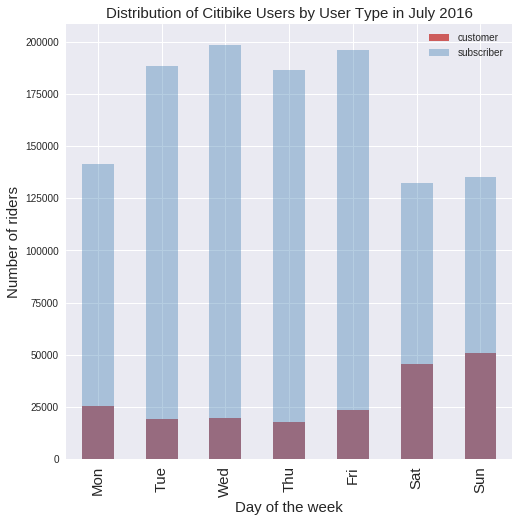

In [39]:
fig = pl.figure(figsize(8,8))
norm_c07 = 1
norm_s07 = 1

ax = ((counts_c07)/norm_c07).plot(kind='bar', color='IndianRed', label='customer')
ax = ((counts_s07)/norm_s07).plot(kind='bar', color='SteelBlue', label='subscriber', alpha=0.4)

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=15)
ax.set_xlabel('Day of the week', fontsize=15)
ax.set_ylabel('Number of riders', fontsize=15)
ax.set_title('Distribution of Citibike Users by User Type in July 2016', fontsize=15)
pl.legend()

## Figure 5. Distribution of Citibike users by user type in July 2016, absolute counts
Based from the absolute counts, it can be seen that there seems to be more subscribers over than customers daily. However, it can also be seen that there is a decrease in the number of subscribers using the CitiBike on weekends.

#### For N counts, the error is $\sqrt{N}$, because counts follow a Poisson statistic

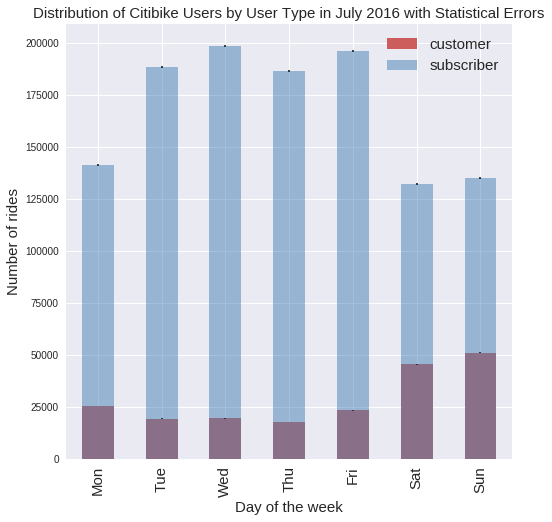

In [51]:
fig = pl.figure(figsize(8,8))

norm_c07 = 1
error_c07 = np.sqrt(counts_c07)
ax = ((counts_c07) / norm_c07).plot(kind="bar", color='IndianRed', label='customer',
                               yerr=[((error_c07) / norm_c07, (error_c07) / norm_c07)])

norm_s07 = 1
error_s07 = np.sqrt(counts_s07)
ax = ((counts_s07) / norm_s07).plot(kind="bar", color='SteelBlue', alpha=0.5, label='subscriber',
                               yerr=[((error_s07) / norm_s07, (error_s07) / norm_s07)])

ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=15)
ax.set_ylabel ("Number of rides", fontsize=15)
ax.set_xlabel ("Day of the week", fontsize=15)
ax.set_title('Distribution of Citibike Users by User Type in July 2016 with Statistical Errors', fontsize=15)
pl.legend(['customer','subscriber'],fontsize=15)

## Figure 6. Distribution of Citibike users by user type in July 2016, absolute counts, with statistical errors
There's not much difference from Figure 5, except the statistical errors are included in this plot.

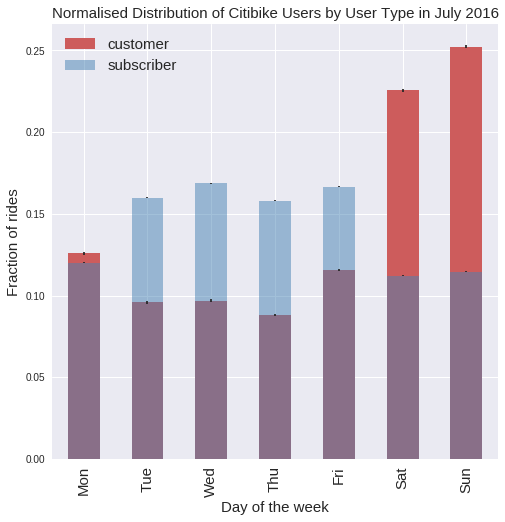

In [50]:
fig = pl.figure(figsize(8,8))

norm_c07 = counts_c07.sum()
ax = ((counts_c07) / norm_c07).plot(kind="bar", color='IndianRed', label='customer',
                               yerr=[((error_c07) / norm_c07, (error_c07) / norm_c07)])

norm_s07 = counts_s07.sum()
ax = ((counts_s07) / norm_s07).plot(kind="bar", color='SteelBlue', alpha=0.5, 
                                label='subscriber', yerr=[((error_s07) / norm_s07, (error_s07) / norm_s07)])

ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=15)
ax.set_ylabel ("Fraction of rides", fontsize=15)
ax.set_xlabel ("Day of the week", fontsize=15)
ax.set_title('Normalised Distribution of Citibike Users by User Type in July 2016', fontsize=15)
pl.legend(['customer','subscriber'],fontsize=15)

## Figure 7. Distribution of Citibike users by user type in July 2016, normalized
Now that the data is normalized, we can clearly see that there are more subscribers than customers out during the weekdays and that there are more customers than subscribers on the weekends.

# Set up the test of proportions

In [42]:
week_s07 = sum(counts_s07[:-2]) * 1.0 / norm_s07
weekend_s07 = sum(counts_s07[-2:]) * 1.0 / norm_s07

eweek_s07 = np.sqrt(sum(error_s07[:-2]**2)) / norm_s07
eweekend_s07 = np.sqrt(sum(error_s07[-2:]**2)) / norm_s07

week_c07 = sum(counts_c07[:-2]) * 1.0 / norm_c07
weekend_c07 = sum(counts_c07[-2:]) * 1.0 / norm_c07

eweek_c07 = np.sqrt(sum(error_c07[:-2]**2)) / norm_c07
eweekend_c07 = np.sqrt(sum(error_c07[-2:]**2)) / norm_c07

In [43]:
print("Subrscriber: week:{0:.4f}, weekend:{1:.4f}, weekend error:{2:.4f}, weekend error:{3:.4f}"\
      .format(week_s07, weekend_s07, eweek_s07, eweekend_s07))
print("Customer: week:{0:.4f}, weekend:{1:.4f}, weekend error:{2:.4f}, weekend error:{3:.4f}"\
      .format(week_c07, weekend_c07, eweek_c07, eweekend_c07))

Subrscriber: week:0.7732, weekend:0.2268, weekend error:0.0008, weekend error:0.0004
Customer: week:0.5220, weekend:0.4780, weekend error:0.0016, weekend error:0.0015


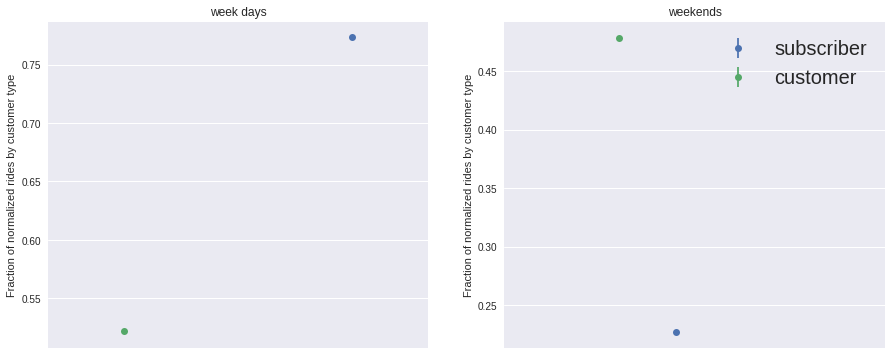

In [44]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

ax1.errorbar([0.4], [week_s07], yerr=[eweek_s07], fmt='o', label='subscriber')
ax1.errorbar([0.1], [week_c07], yerr=[eweek_c07], fmt='o', label='customer')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [weekend_s07], yerr=[eweekend_s07], fmt='o', label='subscriber')
ax2.errorbar([0.1], [weekend_c07], yerr=[eweekend_c07], fmt='o', label='customer')
ax1.set_xlim(0, 0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by customer type")
ax1.set_ylabel("Fraction of normalized rides by customer type")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

## Figure 4. Fraction of Citibike bikers per customer type in December 2016 for weekdays (left) and weekends (right)

In [45]:
week_count_s07 = sum(counts_s07[:-2]) * 1.0
weekend_count_s07 = sum(counts_s07[-2:]) * 1.0

week_count_c07 = sum(counts_c07[:-2]) * 1.0
weekend_count_c07 = sum(counts_c07[-2:]) * 1.0

print('Sample size:')
print('Subscriber: week: {0:.2f}, weekend: {1:.2f}, total: {2:.2f}'\
      .format(week_count_s07, weekend_count_s07, week_count_s07 + weekend_count_s07))
print('Customer: week: {0:.2f}, weekend: {1:.2f}, total: {2:.2f}'\
      .format(week_count_c07, weekend_count_c07, week_count_c07 + weekend_count_c07))

Sample size:
Subscriber: week: 911052.00, weekend: 267167.00, total: 1178219.00
Customer: week: 105396.00, weekend: 96495.00, total: 201891.00


| User Type       |      weekday      |     weekend       |                   
|-----------------|-------------------|-------------------|-----------|
| Subscriber      | 0.819 * 1,178,219 | 0.181 * 1,178,219 | 1,178,219 |
| Customer        | 0.615 *   201,891 | 0.385 *   201,891 |   201,891 |
|                 |                   |                   |           |
| TOTAL           |     1,016,448     |      363,662      | 1,380,110 |

In [46]:
sample_values07 = np.array([[week_s07 * sum(counts_s07), weekend_s07 * sum(counts_s07)],\
                            [week_c07 * sum(counts_c07), weekend_c07 * sum(counts_c07)]])
print(sample_values07)

[[ 911052.  267167.]
 [ 105396.   96495.]]


In [47]:
chisq07 = evalChisq(sample_values07)

In [48]:
# degrees of freedom: Nvar - 1 
DOF07 = len(sample_values07) - 1
print ('chi sq statistics for user type ridership on weekdays vs weekends: '+
       'chisq = {:.3f}, DOF = {:d}'.format(chisq07, DOF07))

chi sq statistics for user type ridership on weekdays vs weekends: chisq = 56042.334, DOF = 1


In [49]:
chi_minalpha95 = 3.84
print ("The null hypothesis that subscribers bike more on the weekends and customers bike more on weekdays")
if chisq > chi_minalpha95 :
    print ("can be rejected at alpha = 0.05")
else: 
    print ("cannot be rejected (p<0.05)")
print ("with a chi square statistics of {:.2f}".format(chisq07))


The null hypothesis that subscribers bike more on the weekends and customers bike more on weekdays
can be rejected at alpha = 0.05
with a chi square statistics of 56042.33


| Reporting Month | Chi-square statistic |
| --------------- | -------------------- |
| March 2015      | 2,154.94             |
| June 2015       | 31,520.97            |
| July 2016       | 56,042.33            |
| December 2016   | 8,458.31             |